# TimeSeries
- **It is a set of data points indexed in time order**

## 1. DatetimeIndex and Resample

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("aapl.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,07-Jul-17,142.90,144.75,142.90,144.18,19201712
1,06-Jul-17,143.02,143.50,142.41,142.73,24128782
2,05-Jul-17,143.69,144.79,142.72,144.09,21569557
3,03-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [3]:
# DateTimeIndex

type(df.Date[0])  #its an string object

str

In [4]:
#apply method parse_dates=["Date"] to change date column dtype
#To change integer index column to date column 

df=pd.read_csv("aapl.csv", parse_dates=["Date"], index_col="Date")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [5]:
#now index is of DatetimeIndex

df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

# Benefits of Date time Index

In [6]:
#For e.g retreiving data only for the required date.
#partial indexing
df.loc["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [7]:
#findaverage apple share price in month of january
#Close provides the timeseries of closing share price

df.loc["2017-01"].Close.mean()

119.57000000000001

In [8]:
df.sort_index().loc["2017-01-01":"2017-01-07"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900


# Resampling

In [9]:
df.Close.resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

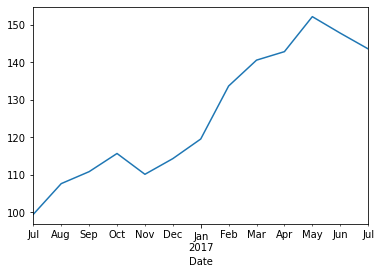

In [10]:
%matplotlib inline
df.Close.resample('M').mean().plot()#       #Monthly frequency

<AxesSubplot:xlabel='Date'>

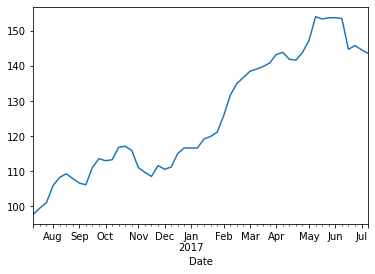

In [11]:
df.Close.resample('W').mean().plot()#       #weekly frequency

<AxesSubplot:xlabel='Date'>

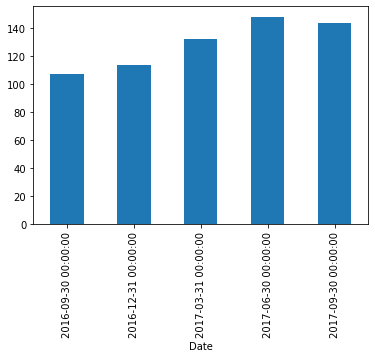

In [12]:
df.Close.resample('Q').mean().plot(kind='bar') #quaterly chart

# 2. Date_range

In [13]:
#how to handle timeseries data without date column?

df1=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/15_ts_date_range/aapl_no_dates.csv")#how to handle missing data?
df1.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [14]:
#provide the required date range an davoid weekends as frequency applied to "B:Business days"

rng =pd.date_range(start="6/1/2017",end='6/30/2017',freq='B')
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [15]:
df1.set_index(rng,inplace=True)
df1.head()

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647


<AxesSubplot:>

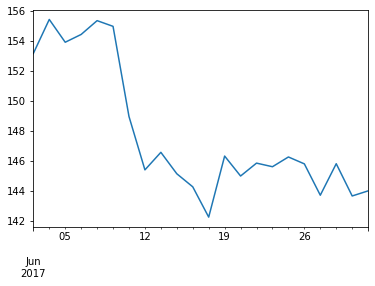

In [16]:
#benefits of datatime index

%matplotlib inline
df1.Close.plot()

In [17]:
df1.loc["2017-06-01":"2017-06-10"].Close.mean()

153.7642857142857

In [18]:
df1.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [19]:
df1.asfreq('W',method='pad')

,Open,High,Low,Close,Volume
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-11,155.19,155.19,146.02,148.98,64882657
2017-06-18,143.78,144.50,142.20,142.27,50361093
2017-06-25,145.13,147.16,145.11,146.28,35439389


In [20]:
rng=pd.date_range(start="1/1/2017",periods=72,freq='B')
rng

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
               '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
               '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
               '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20',
      

In [21]:
import numpy as np
rand=np.random.randint(1,10,len(rng))
rand

array([9, 7, 5, 2, 9, 3, 6, 4, 4, 9, 5, 8, 1, 2, 5, 5, 8, 1, 8, 7, 7, 4,
       9, 8, 6, 1, 4, 3, 9, 4, 9, 2, 6, 8, 4, 7, 7, 8, 7, 7, 1, 7, 3, 9,
       7, 8, 5, 7, 2, 5, 2, 3, 6, 1, 9, 7, 4, 8, 1, 4, 4, 3, 4, 4, 6, 9,
       6, 6, 4, 1, 2, 3])

In [22]:
ts=pd.Series(rand,index=rng)
ts.head(10)

2017-01-02    9
2017-01-03    7
2017-01-04    5
2017-01-05    2
2017-01-06    9
2017-01-09    3
2017-01-10    6
2017-01-11    4
2017-01-12    4
2017-01-13    9
Freq: B, dtype: int32

# Handling Holidays in Calendar

In [23]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/16_ts_holidays/aapl_no_dates.csv")
df.head()

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636


In [24]:
pd.date_range(start="7/1/2017",end='7/21/2017',freq='B')

#4july - holiday in us (independence day) - NO stock trading

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

In [25]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

#creating custom business day
#supply USFederalHolidayCalendar to calendar method
#creating instance of CustomBusinessDay
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [26]:
#apply created instance "usb" as frequency

rng = pd.date_range(start="7/1/2017",end="7/21/2017",freq=usb)

In [27]:
df.set_index(rng,inplace=True)
df

#Now the df dont contain USA holiday as well as weekends

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061
2017-07-17,148.82,150.90,148.57,149.56,23793456


In [28]:
#building custom Holiday Calendar
from pandas.tseries.holiday import AbstractHolidayCalendar,nearest_workday,Holiday

class myBdayCalendar(AbstractHolidayCalendar):
    """
    Mahesh Purbia Birthday Calendar rules
    """
    rules = [
        Holiday("Mahesh Purbia", month=5, day=26)#, observance=nearest_workday),#custom holiday calendar
       ]
myc = CustomBusinessDay(calendar=myBdayCalendar())
myc

<CustomBusinessDay>

In [29]:
pd.date_range(start='5/1/2022',end='5/30/2022', freq=myc)

DatetimeIndex(['2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
               '2022-05-06', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-05-16', '2022-05-17',
               '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-23',
               '2022-05-24', '2022-05-25', '2022-05-27', '2022-05-30'],
              dtype='datetime64[ns]', freq='C')

### weekmask

In [30]:
#for different countries weekdays are different
#Example : Egypt weekend is -> Friday and Saturday

b = CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu')
pd.date_range(start='7/1/2017', end='7/30/2017', freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27',
               '2017-07-30'],
              dtype='datetime64[ns]', freq='C')

In [31]:
b = CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu', holidays=['2017-07-04'])
pd.date_range(start='5/1/2022', end='5/30/2022', freq=b)

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-08', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-15', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-22',
               '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-29', '2022-05-30'],
              dtype='datetime64[ns]', freq='C')

# 3. to_datetime

- Most common problem in data analysis is **`lack of uniformity in the structure of input data.`**

5th january, 2017 can be written as following:-
- 2017-01-05
- jan 5, 2017
- 01/05/2017
- 2017/01/05
- 2017.01.05 etc.

In [32]:
dates= ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017/01/05'
, '2017.01.05', '20170105']

pd.to_datetime(dates)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

In [33]:
dates= ['2017-01-05 02:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2017', '2017/01/05'#
, '2017.01.05', '20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [34]:
# Different DATE TIME FORMAT are followed in different places

# US : dd/mm/yyyy
# Europe : dd/mm/yyyy
    
pd.to_datetime('5/1/2017')

Timestamp('2017-05-01 00:00:00')

In [35]:
pd.to_datetime('5/1/2017',dayfirst=True) #to handle europe date

Timestamp('2017-01-05 00:00:00')

In [36]:
#custom format
pd.to_datetime('5$1$2017', format='%d$%m$%Y')

Timestamp('2017-01-05 00:00:00')

### Handle error and garbage strings in to_datetime function

In [37]:
dates= ['2017-01-05 02:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2017', '2017/01/05'#
, '2017.01.05', 'abc']
pd.to_datetime(dates, errors='ignore')

#no conversion will happen

Index(['2017-01-05 02:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2017',
       '2017/01/05', '2017.01.05', 'abc'],
      dtype='object')

In [38]:
#conversion will take place ignoring the error part only
#invalid string will convert to NaT : Not a timestamp

dates= ['2017-01-05 02:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2017', '2017/01/05'#
, '2017.01.05', 'abc']
pd.to_datetime(dates, errors='coerce')

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00',                 'NaT'],
              dtype='datetime64[ns]', freq=None)

### Handle epoch format in to_datetime format()

**Epoch (unix time)** is number of seconds that have passed since **`Jan 1 , 1970 00:00:00 UTC`**

[Epoch converter](https://www.epochconverter.com/)

In [39]:
t = 1501356749
pd.to_datetime(t, unit='s')

Timestamp('2017-07-29 19:32:29')

In [40]:
dt=pd.to_datetime([t], unit='s')
dt

DatetimeIndex(['2017-07-29 19:32:29'], dtype='datetime64[ns]', freq=None)

In [41]:
dt.view('int64')

array([1501356749000000000], dtype=int64)

## Period and Period Index

In [42]:
y = pd.Period('2016')
y

Period('2016', 'A-DEC')

In [43]:
dir(y)

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_offset',
 '_add_timedeltalike_scalar',
 '_dtype',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_require_matching_freq',
 'asfreq',
 'day',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [44]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [45]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [46]:
# monthly time period

m=pd.Period('2011-1', freq='M')
m

Period('2011-01', 'M')

In [47]:
m.start_time

Timestamp('2011-01-01 00:00:00')

In [48]:
m.end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [49]:
#we can perform arithmetic operations on period objects

m+1

Period('2011-02', 'M')

In [50]:
#daily timeperiod : default

d = pd.Period('2017-02-28')
d

Period('2017-02-28', 'D')

In [51]:
d = pd.Period('2017-02-28',freq='D')
d

Period('2017-02-28', 'D')

In [52]:
#automatically increase date after checking if its a leap year
d+1

Period('2017-03-01', 'D')

In [53]:
h=pd.Period('2016-02-28 23:00:00', freq='H')
h

Period('2016-02-28 23:00', 'H')

In [54]:
h.start_time

Timestamp('2016-02-28 23:00:00')

In [55]:
h.end_time

Timestamp('2016-02-28 23:59:59.999999999')

In [56]:
h+1

Period('2016-02-29 00:00', 'H')

In [57]:
h+pd.offsets.Hour(1)

Period('2016-02-29 00:00', 'H')

In [58]:
#qurterly period

q = pd.Period('2017Q1', freq='Q-JAN')
q

Period('2017Q1', 'Q-JAN')

In [59]:
q.start_time

Timestamp('2016-02-01 00:00:00')

In [60]:
q.end_time

Timestamp('2016-04-30 23:59:59.999999999')

In [61]:
q.asfreq('M',how='end')

Period('2016-04', 'M')

In [62]:
q = pd.Period('2017Q1', freq='Q-JAN')
q

Period('2017Q1', 'Q-JAN')

In [63]:
q2 = pd.Period('2018Q2', freq='Q-JAN')
q2

Period('2018Q2', 'Q-JAN')

In [64]:
q2-q

<5 * QuarterEnds: startingMonth=1>

In [65]:
idx = pd.period_range('2011','2017', freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]')

In [66]:
idx[0].start_time

Timestamp('2010-11-01 00:00:00')

In [67]:
idx[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [68]:
idx = pd.period_range('2011',periods=10, freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1'],
            dtype='period[Q-JAN]')

In [69]:
idx[0].start_time

Timestamp('2010-11-01 00:00:00')

In [70]:
idx[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [71]:
import numpy as np

ps = pd.Series(np.random.randn(len(idx)), idx)
ps

2011Q4    0.106117
2012Q1    0.988470
2012Q2    0.366243
2012Q3   -1.958257
2012Q4    0.825221
2013Q1    0.941086
2013Q2   -1.260400
2013Q3   -1.596691
2013Q4   -1.004386
2014Q1    1.743333
Freq: Q-JAN, dtype: float64

In [72]:
ps.index

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1'],
            dtype='period[Q-JAN]')

In [73]:
ps['2011':'2013']

2011Q4    0.106117
2012Q1    0.988470
2012Q2    0.366243
2012Q3   -1.958257
2012Q4    0.825221
2013Q1    0.941086
2013Q2   -1.260400
2013Q3   -1.596691
2013Q4   -1.004386
2014Q1    1.743333
Freq: Q-JAN, dtype: float64

In [74]:
pst=ps.to_timestamp()
pst

2010-11-01    0.106117
2011-02-01    0.988470
2011-05-01    0.366243
2011-08-01   -1.958257
2011-11-01    0.825221
2012-02-01    0.941086
2012-05-01   -1.260400
2012-08-01   -1.596691
2012-11-01   -1.004386
2013-02-01    1.743333
Freq: QS-NOV, dtype: float64

In [75]:
pst.index

DatetimeIndex(['2010-11-01', '2011-02-01', '2011-05-01', '2011-08-01',
               '2011-11-01', '2012-02-01', '2012-05-01', '2012-08-01',
               '2012-11-01', '2013-02-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [76]:
pst.to_period()

2010Q4    0.106117
2011Q1    0.988470
2011Q2    0.366243
2011Q3   -1.958257
2011Q4    0.825221
2012Q1    0.941086
2012Q2   -1.260400
2012Q3   -1.596691
2012Q4   -1.004386
2013Q1    1.743333
Freq: Q-DEC, dtype: float64

In [77]:
#Applying period concept with example data

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/18_ts_period/wmt.csv')
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [78]:
df.set_index('Line Item', inplace=True)
df

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [79]:
df=df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [80]:
df.index

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [81]:
#Convert object to a period object

df.index = pd.PeriodIndex(df.index,freq = 'Q-JAN')
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]')

In [82]:
df['start date'] = df.index.map(lambda x: x.start_time)
df

Line Item,Revenue,Expenses,Profit,start date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [83]:
df['end date'] = df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


# Timezone Handling:

In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/pandas/19_ts_timezone/msft.csv",parse_dates=True, header=1,index_col='Date Time')
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [85]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

## 2 Types of DateTime Objects in Python

1. Naive (No timezone awareness)
2. Time zone aware datetime

In [86]:
df=df.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

- **`Note-4`** : means us/eastern time zone is 4hrs behind UTC(coordinated universal time zone) 


In [87]:
#Convert us/eastern time zone to berlin time zone

df = df.tz_convert(tz='Europe/Berlin')
df

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [88]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [89]:
df=df.tz_convert(tz='Asia/Calcutta')
df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


In [90]:
rng = pd.date_range(start='1/1/2017', periods=10, freq='H')
rng

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [91]:
rng = pd.date_range(start='1/1/2017', periods=10, freq='H',tz='Europe/London')
rng

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00', '2017-01-01 05:00:00+00:00',
               '2017-01-01 06:00:00+00:00', '2017-01-01 07:00:00+00:00',
               '2017-01-01 08:00:00+00:00', '2017-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='H')

In [92]:
rng = pd.date_range(start='1/1/2017', periods=10, freq='H',tz='dateutil/Europe/London')
rng

DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 01:00:00+00:00',
               '2017-01-01 02:00:00+00:00', '2017-01-01 03:00:00+00:00',
               '2017-01-01 04:00:00+00:00', '2017-01-01 05:00:00+00:00',
               '2017-01-01 06:00:00+00:00', '2017-01-01 07:00:00+00:00',
               '2017-01-01 08:00:00+00:00', '2017-01-01 09:00:00+00:00'],
              dtype='datetime64[ns, tzfile('Europe/Belfast')]', freq='H')

### Arithmetic operations b/w 2 different time zones

In [93]:
rng = pd.date_range(start='2017-08-22 09:0:00' ,periods=10, freq='30min')
s = pd.Series(range(10), index=rng)
s

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [94]:
b = s.tz_localize(tz='Europe/Berlin')
b

2017-08-22 09:00:00+02:00    0
2017-08-22 09:30:00+02:00    1
2017-08-22 10:00:00+02:00    2
2017-08-22 10:30:00+02:00    3
2017-08-22 11:00:00+02:00    4
2017-08-22 11:30:00+02:00    5
2017-08-22 12:00:00+02:00    6
2017-08-22 12:30:00+02:00    7
2017-08-22 13:00:00+02:00    8
2017-08-22 13:30:00+02:00    9
dtype: int64

In [95]:
b.index

DatetimeIndex(['2017-08-22 09:00:00+02:00', '2017-08-22 09:30:00+02:00',
               '2017-08-22 10:00:00+02:00', '2017-08-22 10:30:00+02:00',
               '2017-08-22 11:00:00+02:00', '2017-08-22 11:30:00+02:00',
               '2017-08-22 12:00:00+02:00', '2017-08-22 12:30:00+02:00',
               '2017-08-22 13:00:00+02:00', '2017-08-22 13:30:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq=None)

In [96]:
m = s.tz_localize(tz='Asia/Calcutta')
m

2017-08-22 09:00:00+05:30    0
2017-08-22 09:30:00+05:30    1
2017-08-22 10:00:00+05:30    2
2017-08-22 10:30:00+05:30    3
2017-08-22 11:00:00+05:30    4
2017-08-22 11:30:00+05:30    5
2017-08-22 12:00:00+05:30    6
2017-08-22 12:30:00+05:30    7
2017-08-22 13:00:00+05:30    8
2017-08-22 13:30:00+05:30    9
dtype: int64

In [97]:
b+m

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
dtype: float64

# shifting and Lagging

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/pandas/20_shift_lag/fb.csv', parse_dates=['Date'], index_col='Date')
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [99]:
df.shift(1)

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [100]:
df.shift(2)

,Price
Date,
2017-08-15,NaN
2017-08-16,NaN
2017-08-17,171.00
2017-08-18,170.00
2017-08-21,166.91
2017-08-22,167.41
2017-08-23,167.78
2017-08-24,169.64
2017-08-25,168.71


In [101]:
df.shift(-1)

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


In [102]:
df['Prev Day Price'] = df['Price'].shift(1)
df

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [103]:
df['1 day change'] = df['Price'] - df['Prev Day Price']
df

,Price,Prev Day Price,1 day change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


In [104]:
df['5 day %return'] = (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5)
df

,Price,Prev Day Price,1 day change,5 day %return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


In [105]:
df = df[['Price']]
df

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


In [106]:
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [107]:
df.index = pd.date_range(start='2017-08-15', periods=10, freq='B')
df.index

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [108]:
df

,Price
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32
2017-08-28,167.24


In [109]:
df.tshift(1)

C:\Users\hp\AppData\Local\Temp\ipykernel_21128\4060579993.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(1)


,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24


In [110]:
df.tshift(-1)

C:\Users\hp\AppData\Local\Temp\ipykernel_21128\1833280753.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(-1)


,Price
2017-08-14,171.00
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24
